In [1]:
# Step 1: Upload the Dataset (Here, Scores of the Students)
import pandas as pd
data = pd.read_csv('student-por.csv',sep=';')
print('The number of students whose data is collected is: ',len(data))

The number of students whose data is collected is:  649


In [2]:
# Step 2: Add labels to the data.
# For every 20 marks, a label between 0-5 will be given to each student.
data['pass']=data.apply(lambda row: 1 if(row['G1']+row['G2']+row['G3']) >= 40 else 0, axis=1)
data=data.drop(['G1','G2','G3'],axis=1)
# If the total score become greater than the required score then only the student is considered to have passed
data.head()
# displaying the data obtained

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,0


In [3]:
# Step 3: Encode the Categorical Columns
data = pd.get_dummies(data, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [4]:
# Step 4: Preparing the data for spliting.
#Shuffling Rows in the data file
data = data.sample(frac=1)

In [5]:
# Step 5: Splitting the data into training and testing data.
data_train = data[:500]
data_test = data[500:]
# We tend to keep most of the data for training the model that we build and
# keep a small amount of data for testing the model for its accuracy
data_train_att = data_train.drop(['pass'],axis=1)
data_train_pass = data_train['pass']

data_test_att = data_test.drop(['pass'],axis=1)
data_test_pass = data_test['pass']

data_att = data.drop(['pass'],axis=1)
data_pass = data['pass']

In [6]:
# Step 6: Obtain the results of analysis
import numpy as np
#total_no_of_students_passed=np.sum(data_pass)
#total_no_of_students=len(data_pass)
#percentage_of_students_passed=(100*float(total_no_of_students_passed)/total_no_of_students
print("Passing Students: %d out of %d which is (%.2f%%)"%(np.sum(data_pass),len(data_pass),(100*float(np.sum(data_pass))/len(data_pass))))

Passing Students: 180 out of 649 which is (27.73%)


In [7]:
# Step 7: Create a Decision Tree to fit the data into it.
from sklearn import tree
des_tree = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
# We are considering only 5 levels because earlier we had kept labels for 20
# marks each.
des_tree = des_tree.fit(data_train_att,data_train_pass)
data_train_att
data_train_pass

126    0
555    1
198    1
152    0
453    0
408    0
113    1
86     0
186    0
525    1
326    0
21     0
275    0
29     0
34     0
270    1
366    0
521    0
444    0
398    0
452    0
347    0
215    0
396    1
168    0
256    0
512    0
575    0
200    0
648    0
      ..
268    0
434    0
112    0
405    0
538    0
254    0
144    0
492    0
378    1
271    0
534    0
403    1
286    0
104    1
320    0
397    0
66     0
269    1
617    1
127    0
309    0
625    0
497    0
114    0
568    0
296    1
358    0
552    0
249    0
123    0
Name: pass, Length: 500, dtype: int64

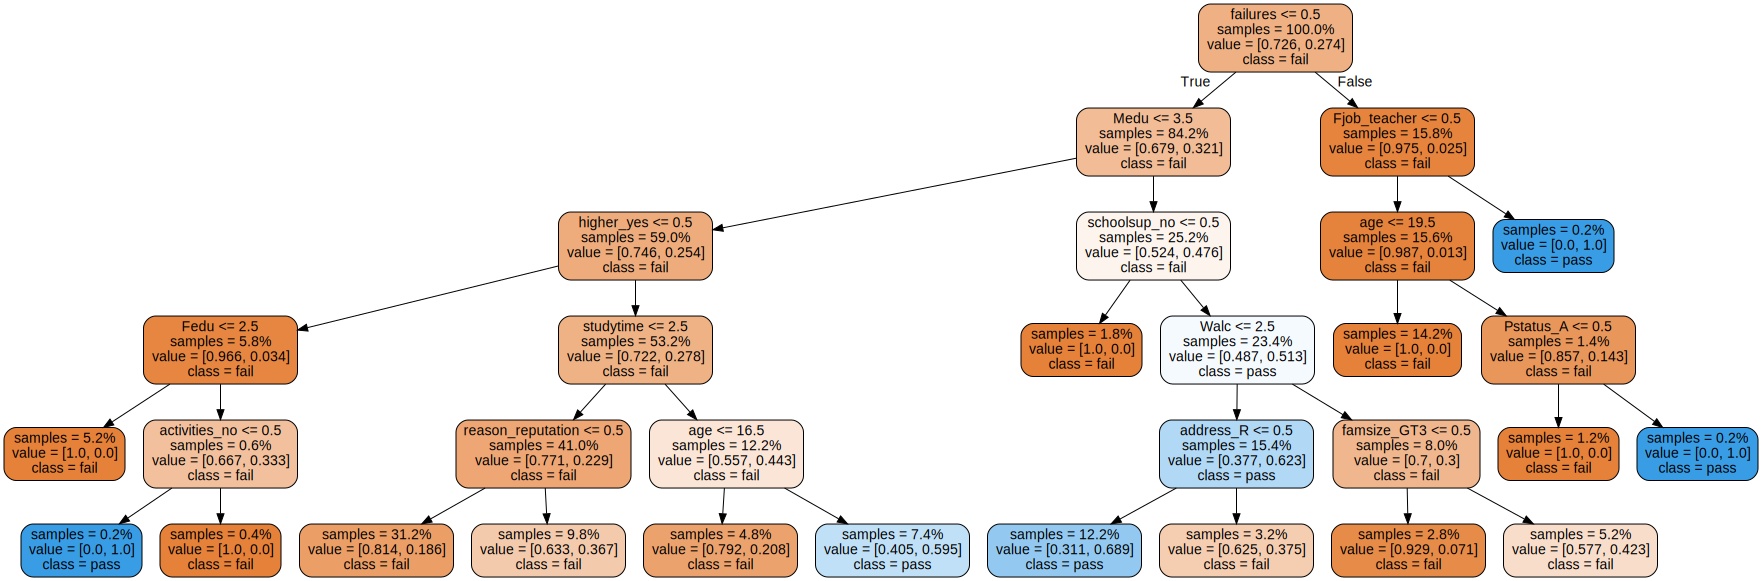

In [8]:
# Step 8: Visualize the tree
import graphviz
dot_data = tree.export_graphviz(des_tree,out_file=None,label="all",impurity=False,proportion=True,feature_names=list(data_train_att),class_names=["fail","pass"],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [10]:
# Step 9: Save the tree
tree.export_graphviz(des_tree,out_file="Student_Performance_Analysed_Tree.dot",label="all",impurity=False,proportion=True,feature_names=list(data_train_att),class_names=["fail","pass"],filled=True,rounded=True)

In [11]:
# Step 10: Checking the score of the model for prediction. Basically, it's accuracy.
des_tree.score(data_test_att,data_test_pass)

0.7315436241610739

In [19]:
# Step 11: Calculate the range of prediction for the training data
from sklearn.model_selection import cross_val_score
scores = cross_val_score(des_tree, data_train_att, data_train_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy of the model: %0.2f \nRange of Correction:(+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy of the model: 0.71 
Range of Correction:(+/- 0.07)


In [20]:
# Step 12: Checking the Accuracy of the Decision Tree
for max_depth in range(1,20):
    des_tree=tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth)
    scores=cross_val_score(des_tree,data_train_att,data_train_pass,cv=5)
    print("Maximum Depth: %d\t Accuracy of the model: %0.2f\tRange of Correction: +/- %0.2f" % (max_depth,scores.mean(),scores.std()*2))

Maximum Depth: 1	 Accuracy of the model: 0.73	Range of Correction: +/- 0.01
Maximum Depth: 2	 Accuracy of the model: 0.70	Range of Correction: +/- 0.06
Maximum Depth: 3	 Accuracy of the model: 0.70	Range of Correction: +/- 0.05
Maximum Depth: 4	 Accuracy of the model: 0.70	Range of Correction: +/- 0.06
Maximum Depth: 5	 Accuracy of the model: 0.71	Range of Correction: +/- 0.06
Maximum Depth: 6	 Accuracy of the model: 0.69	Range of Correction: +/- 0.09
Maximum Depth: 7	 Accuracy of the model: 0.68	Range of Correction: +/- 0.05
Maximum Depth: 8	 Accuracy of the model: 0.68	Range of Correction: +/- 0.06
Maximum Depth: 9	 Accuracy of the model: 0.69	Range of Correction: +/- 0.03
Maximum Depth: 10	 Accuracy of the model: 0.71	Range of Correction: +/- 0.04
Maximum Depth: 11	 Accuracy of the model: 0.70	Range of Correction: +/- 0.04
Maximum Depth: 12	 Accuracy of the model: 0.68	Range of Correction: +/- 0.08
Maximum Depth: 13	 Accuracy of the model: 0.68	Range of Correction: +/- 0.01
Maximum 

In [23]:
# Step 13: Checking Accuracy of the Depth of node of the Decision Tree
depth_accuracy=np.empty((19,3),float)
i=0
for max_depth in range(1,20):
    des_tree=tree.DecisionTreeClassifier(criterion="entropy",max_depth=max_depth)
    scores=cross_val_score(des_tree,data_test_att,data_test_pass,cv=5)
    depth_accuracy[i,0]=max_depth
    depth_accuracy[i,1]=scores.mean()
    depth_accuracy[i,2]=scores.std()*2
    i+=1
    
depth_accuracy

array([[ 1.        ,  0.71159066,  0.02167423],
       [ 2.        ,  0.70470894,  0.07619679],
       [ 3.        ,  0.75873192,  0.07275178],
       [ 4.        ,  0.6664442 ,  0.17121225],
       [ 5.        ,  0.69802744,  0.07283519],
       [ 6.        ,  0.66375973,  0.08438713],
       [ 7.        ,  0.65778272,  0.04564042],
       [ 8.        ,  0.66464961,  0.15226802],
       [ 9.        ,  0.65131628,  0.12768068],
       [10.        ,  0.68490916,  0.12255299],
       [11.        ,  0.67865777,  0.13507257],
       [12.        ,  0.66510938,  0.11196439],
       [13.        ,  0.66555432,  0.18326944],
       [14.        ,  0.70556915,  0.12753276],
       [15.        ,  0.67844271,  0.15258207],
       [16.        ,  0.66464961,  0.14631395],
       [17.        ,  0.70492399,  0.14992358],
       [18.        ,  0.6586726 ,  0.11172497],
       [19.        ,  0.658198  ,  0.13042169]])

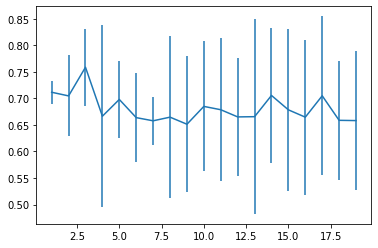

In [24]:
import matplotlib.pyplot as plt
figure,axis=plt.subplots()
axis.errorbar(depth_accuracy[:,0],depth_accuracy[:,1],yerr=depth_accuracy[:,2])
plt.show()